# Занятие 10. Проект построения простой модели машинного обучения

### 1. Loading the libraries and the dataset

In [2]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
filename = "banknote_authentication.csv"
names = ['дисперсия',
         'асимметрия',
         'эксцесс', 'энтропия','класс']
dataset = read_csv(filename, names=names)

### 2. Summarizing the dataset

In [4]:
# shape
dataset

,дисперсия,асимметрия,эксцесс,энтропия,класс
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [5]:
# descriptions
print(dataset.describe())

         дисперсия   асимметрия      эксцесс     энтропия        класс
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


In [6]:
#есть некоторые выбросы на минимальных значениях, но они не настолько сущетсвенны, чтобы убирать данные купюры

In [7]:
# class distribution
print(dataset.groupby('класс').size())

класс
0    762
1    610
dtype: int64


### 3. Visualizing the dataset

#### Univariate Plots

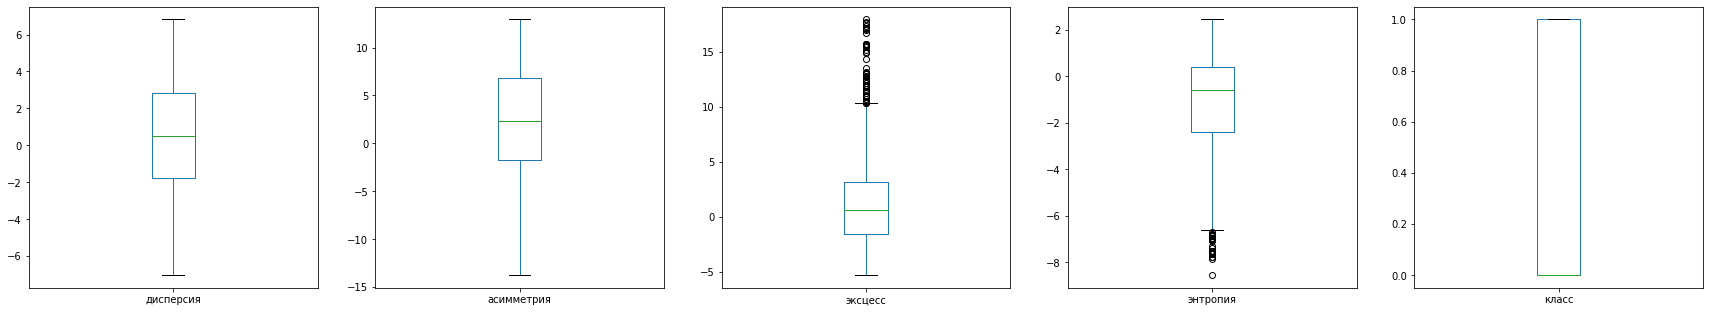

In [8]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False,figsize=(30, 30))
pyplot.show()

In [9]:
# можно заметить, что дисперсия и асиметрия +- нормальные, но с двумя другими данными наблюдаются некоторые особенности. К примеру.
#Можно заметить, что эксцесс и энтропия имеют не нормально рарспределение,а скорее геометорическое и экспоненциальное

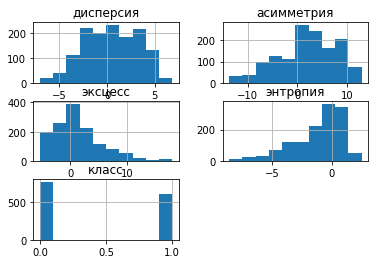

In [10]:
# histograms
dataset.hist()
pyplot.show()

In [11]:
#дисперсия похоже на нормальное распредение 

#### Multivariate Plots

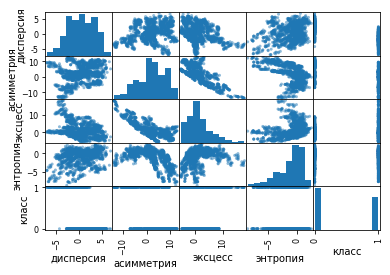

In [12]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

In [13]:
#можно заметить, что у асимметрии и экспецсса имеется некоторая зависимость - линейная 

### 4. Evaluating some algorithms

In [35]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.01
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)
Y

array([0., 0., 0., ..., 1., 1., 1.])

In [36]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.988960 (0.006773)
LDA: 0.976443 (0.013074)
KNN: 0.999265 (0.002206)
CART: 0.982326 (0.012824)
NB: 0.843175 (0.032015)
SVM: 1.000000 (0.000000)


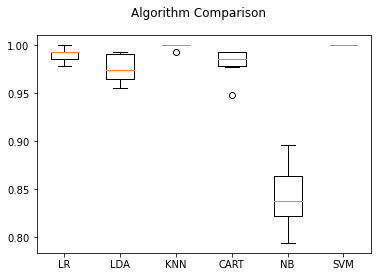

In [37]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### 5. Making some predictions

In [38]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[9 0]
 [0 5]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       1.00      1.00      1.00         5

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

